In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('newyork_listings.csv.gz', compression='gzip')

In [11]:
columns = ['latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price']
f_columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'price']
# df_hotel['price'] = df_need['price'].replace('[\$,]', '', regex=True).astype(float)
#
df['price'] = df['price'].replace('[$,]', '', regex=True).astype(float)
df_need = df[columns]
df_numeric = df[f_columns]

In [12]:
df_need.describe()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price
count,36403.000000,36403.000000,36403.000000,21546.000000,30483.000000,21495.000000,21279.000000
mean,40.728443,-73.947333,2.739197,1.188225,1.385264,1.631542,447.871611
std,0.056336,0.055033,1.870571,0.555564,0.942189,1.204923,3174.205888
min,40.500366,-74.251907,1.000000,0.000000,0.000000,0.000000,3.000000
25%,40.688320,-73.983517,2.000000,1.000000,1.000000,1.000000,90.000000
50%,40.726140,-73.954980,2.000000,1.000000,1.000000,1.000000,150.000000
75%,40.762120,-73.928060,4.000000,1.000000,2.000000,2.000000,257.000000
max,40.911390,-73.711822,16.000000,15.500000,16.000000,40.000000,50052.000000


In [15]:
df_piece = df_need[df_need['room_type']=='Entire home/apt']

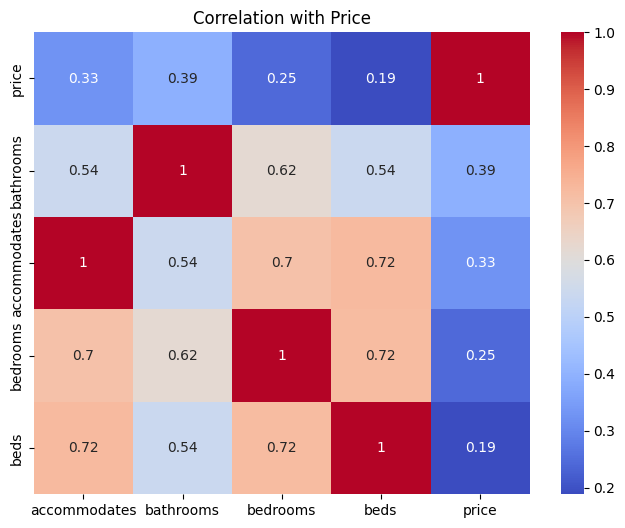

In [18]:
# 상관계수 계산
df_numeric = df_piece[f_columns]
df_numeric = df_numeric.dropna()

corr = df_numeric.corr()

# heatmap 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(corr.sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation with Price')
plt.show()

C:\Users\tower\AppData\Local\Temp\ipykernel_20612\85537585.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_geo.groupby(['lat_bin', 'lon_bin'])['price']


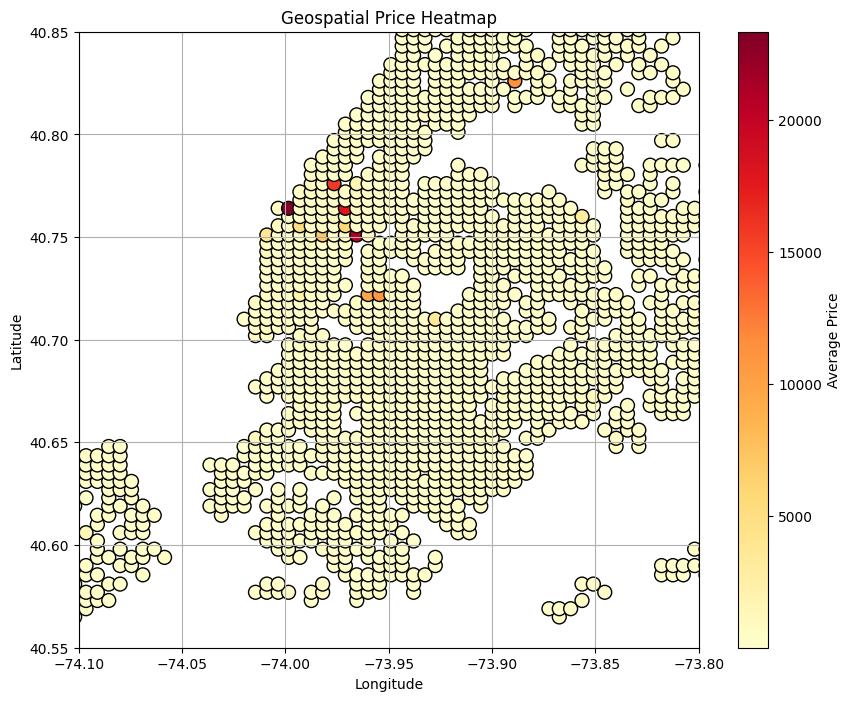

In [22]:
# 결측치 제거 (위도/경도/가격)
df_geo = df_need[['latitude', 'longitude', 'price']].dropna()

# ▶️ 위도/경도 범위를 적절한 bin 단위로 자름 (예: 100m ~ 500m 간격 정도)
lat_bins = np.linspace(df_geo['latitude'].min(), df_geo['latitude'].max(), 100)
lon_bins = np.linspace(df_geo['longitude'].min(), df_geo['longitude'].max(), 100)

# ▶️ 각 위도/경도를 bin에 매핑
df_geo['lat_bin'] = pd.cut(df_geo['latitude'], bins=lat_bins)
df_geo['lon_bin'] = pd.cut(df_geo['longitude'], bins=lon_bins)

# ▶️ 각 구간마다 평균 가격 계산
heatmap_data = (
    df_geo.groupby(['lat_bin', 'lon_bin'])['price']
    .mean()
    .reset_index()
)

# ▶️ bin의 중앙값을 추출해서 좌표로 사용
heatmap_data['lat_center'] = heatmap_data['lat_bin'].apply(lambda x: x.mid)
heatmap_data['lon_center'] = heatmap_data['lon_bin'].apply(lambda x: x.mid)

# ▶️ 시각화 (Scatter 형태의 Heatmap)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    heatmap_data['lon_center'],
    heatmap_data['lat_center'],
    c=heatmap_data['price'],
    cmap='YlOrRd',
    s=100,
    edgecolors='black'
)
plt.colorbar(scatter, label='Average Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-74.1, -73.8)
plt.ylim(40.55, 40.85)
plt.title('Geospatial Price Heatmap')
plt.grid(True)
plt.show()